# scPLAN Annotation Guidelines

In this tutorial, we will introduce the basic usage of scPLAN on integration task. 

## 1. Module dependencies 

In [2]:
from scplan.PLL import PartialLabelLearning
from scplan.Param import Param
from scplan.Encoder import ZINBEncoder
from scplan.DataWork.Atlas import AtlasDataset
from scplan.DataWork.sankey import sankey
import lightning.pytorch as pl
import pandas as pd
import treelib

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


## 2. Param settings and data preparation
 

In [4]:
param = Param()
param.datapath = "/home/bili/Lernen/PLL/Data/PBMCInter/" # Data path
param.target = "PBMCInter_eQTL.h5ad"                     # Specify datasets
param.ref = "PBMCInter_FACS.h5ad"
param.pretrain_epoch = 30                                # Maximal ZINB pretraining epochs
param.enc_dim = [256]                                    # Encoder hidden layer size  
param.dec_dim = [256]                                    # Decoder hidden layer size
param.latent_dim = 64                                    # Latent size
param.epochs = [50,100,150]                              # Training epochs and its stages 
param.batch_size = 1024                                  # Config batch size
param.moco_queue = 2048                                  # Config pool size for contrastive learning 
param.lr = 1e-4                                          # Overall learning rate
param.device = [0]                                       # CUDA device for training

> NOTE!: scPLAN will automatically generate tree for integration task by scHPL, but you could also specify your tree for label as shown in the following block

In [3]:
tree = treelib.Tree()
tree.create_node("root", "root")
tree.create_node("B cell - FACS", "bcfacs", parent="root")
tree.create_node("B cell - eQTL", "bceQTL", parent="root")
tree.create_node("CD14+ Monocyte - FACS", "mo", parent="root")
tree.create_node("CD14+ Monocyte - eQTL", "cmo", parent="mo")
tree.create_node("CD16+ Monocyte - eQTL", "ncmo", parent="mo")
tree.create_node("mDC - eQTL", "mdc", parent="mo")
tree.create_node("CD34+ cell - FACS", "cd34", parent="root")
tree.create_node("Megakaryocyte - eQTL", "mk", parent="cd34")
tree.create_node("pDC - eQTL", "pdc", parent="cd34")
tree.create_node("CD4+ T cell - eQTL", "tc", parent="root")
tree.create_node("CD4+/CD25 T Reg - FACS", "treg", parent="tc")
tree.create_node("CD4+/CD45RA+/CD25- Naive T - FACS", "tn", parent="tc")
tree.create_node("CD4+/CD45RO+ Memory - FACS", "tm", parent="tc")
tree.create_node("CD8+/CD45RA+ Naive Cytotoxic - FACS", "tcy", parent="tc")
tree.create_node("NK cell - FACS", "nk", parent="root")
tree.create_node("CD56+ bright NK cell - eQTL", "bnk", parent="nk")
tree.create_node("CD56+ dim NK cell - eQTL", "dnk", parent="nk")
tree.create_node("CD8+ T cell - eQTL", "cd8", parent="nk")
tree.show()

root
├── B cell - FACS
├── B cell - eQTL
├── CD14+ Monocyte - FACS
│   ├── CD14+ Monocyte - eQTL
│   ├── CD16+ Monocyte - eQTL
│   └── mDC - eQTL
├── CD34+ cell - FACS
│   ├── Megakaryocyte - eQTL
│   └── pDC - eQTL
├── CD4+ T cell - eQTL
│   ├── CD4+/CD25 T Reg - FACS
│   ├── CD4+/CD45RA+/CD25- Naive T - FACS
│   ├── CD4+/CD45RO+ Memory - FACS
│   └── CD8+/CD45RA+ Naive Cytotoxic - FACS
└── NK cell - FACS
    ├── CD56+ bright NK cell - eQTL
    ├── CD56+ dim NK cell - eQTL
    └── CD8+ T cell - eQTL


Initialization of dataset and scPLAN module 

In [5]:
dataset = AtlasDataset(data_path=param.datapath,target=param.target,ref=param.ref)
dataset.initialize(tree=tree)
param = dataset.updateParams(param)
pll = PartialLabelLearning(param)

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:351: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)
/home/bili/Lernen/PLL/plan/DataWork/Atlas.py:155: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partialY[j, :] = (transition_matrix[train_label[j], :])
/home/bili/Lernen/PLL/plan/DataWork/Atlas.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_Y[ref_index,:] = torch.from_numpy(ref_partial_Y).float()


tensor([4., 5., 0., 0., 0., 1., 1., 2., 2., 2., 2., 3., 3., 3.])


/home/bili/Lernen/PLL/plan/DataWork/Atlas.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_Y[target_index,:] = torch.from_numpy(target_partial_Y).float()


## 3. Initialization of scPLAN module

In [6]:
pll.Setup(ZINBEncoder,pretrain=True,dataset=dataset)

runid: 968f49c03c5148ddb3d559f8cbd3e7d9


/home/bili/Lernen/PLL/plan/DataWork/utils.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.size_factor = torch.Tensor(values.obs["size_factor"])      # Compute size factor
/home/bili/Lernen/PLL/plan/DataWork/utils.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.cell_label = torch.Tensor(values.obs["cell_label"]).int()  # Initialize ground truth label
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-package

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1024. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.00020892961308540398
Restoring states from the checkpoint path at /home/bili/Lernen/PLL/Experiments/MultiDataset/scHPL/PBMCInter/.lr_find_f5148125-a167-4054-a921-87cde7226986.ckpt
Restored all states from the checkpoint at /home/bili/Lernen/PLL/Experiments/MultiDataset/scHPL/PBMCInter/.lr_find_f5148125-a167-4054-a921-87cde7226986.ckpt

  | Name  | Type            | Params
------------------------------------------
0 | AE    | ZINBAutoEncoder | 2.1 M 
1 | zloss | ZINBLoss        | 0     
------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.353     Total estimated model params size

Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


## 4. scPLAN training

In this section we train scPLAN in a two-layer scheme

In [7]:
stage_1_trainer = pl.Trainer(max_epochs=param.epochs[-2],devices=param.device)
stage_1_trainer.fit(pll)
stage_1_trainer.save_checkpoint("stage1.ckpt")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoint directory /home/bili/Lernen/PLL/Experiments/MultiDataset/scHPL/PBMCInter/22/968f49c03c5148ddb3d559f8cbd3e7d9/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type  | Params
--------------------------------
0 | model | Model | 4.2 M 
--------------------------------
2.1 M     Trainable params
2.1 M     Non-trainable params
4.2 M     Total params
16.706    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [8]:
pred_loader = dataset.load(batch_size=param.batch_size)
pred_trainer = pl.Trainer(devices=param.device)
stage_1_pred_out = pred_trainer.predict(pll,pred_loader)
stage_1_pred_data = pll.getPredictions(stage_1_pred_out)

/home/bili/Lernen/PLL/plan/DataWork/utils.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.size_factor = torch.Tensor(values.obs["size_factor"])      # Compute size factor
/home/bili/Lernen/PLL/plan/DataWork/utils.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.cell_label = torch.Tensor(values.obs["cell_label"]).int()  # Initialize ground truth label
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/log

Predicting: |          | 0/? [00:00<?, ?it/s]

In [9]:
stage_2_trainer = pl.Trainer(max_epochs=param.epochs[-1],logger=logger,devices=param.device)
stage_2_trainer.fit(pll,ckpt_path="stage1.ckpt")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoint directory /home/bili/Lernen/PLL/Experiments/MultiDataset/scHPL/PBMCInter/22/968f49c03c5148ddb3d559f8cbd3e7d9/checkpoints exists and is not empty.
Restoring states from the checkpoint path at stage1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type  | Params
--------------------------------
0 | model | Model | 4.2 M 
--------------------------------
2.1 M     Trainable params
2.1 M     Non-trainable params
4.2 M     Total params
16.706    Total estimated model params size (MB)
Restored all states from the checkpoint at stage1.ckpt
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (20) is smaller than the logging interval

Training: |          | 0/? [00:00<?, ?it/s]

Updating label clusters
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])


`Trainer.fit` stopped: `max_epochs=150` reached.


In [11]:
pred_loader = dataset.load(batch_size=param.batch_size)
pred_trainer = pl.Trainer(devices=param.device)
stage_2_pred_out = pred_trainer.predict(pll,pred_loader)
stage_2_pred_data = pll.getPredictions(stage_2_pred_out)

/home/bili/Lernen/PLL/plan/DataWork/utils.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.size_factor = torch.Tensor(values.obs["size_factor"])      # Compute size factor
/home/bili/Lernen/PLL/plan/DataWork/utils.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.cell_label = torch.Tensor(values.obs["cell_label"]).int()  # Initialize ground truth label
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-package

Predicting: |          | 0/? [00:00<?, ?it/s]

## 5. Downstream analysis

After training, we could extract scPLAN's latent and perform downstream analysis

Accurarcy: 0.5591850086452638


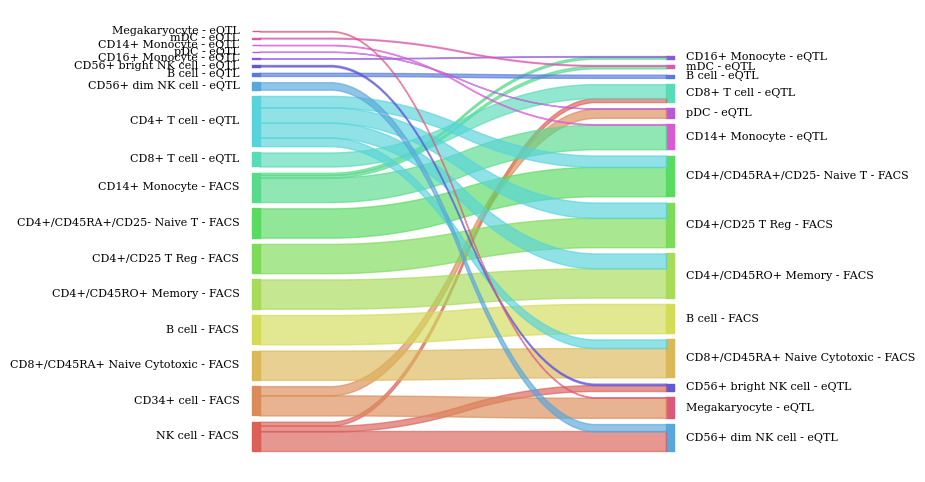

In [12]:
true_label = stage_1_pred_data.obs["cell_type"].to_numpy()
pred_label = stage_1_pred_data.obs["pred"].to_numpy()
df = pd.DataFrame([true_label,pred_label]).T
accuracy = (pred_label == true_label).sum()/len(df)
print("Accurarcy: {}".format(accuracy))
fig = sankey(true_label, pred_label,aspect=150,fontsize=8)

In [13]:
import scanpy as sc
sc.pp.neighbors(stage_1_pred_data,use_rep="latent")
sc.tl.umap(stage_1_pred_data)
sc.pp.neighbors(stage_2_pred_data,use_rep="latent")
sc.tl.umap(stage_2_pred_data)

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/umap/distances.py:

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


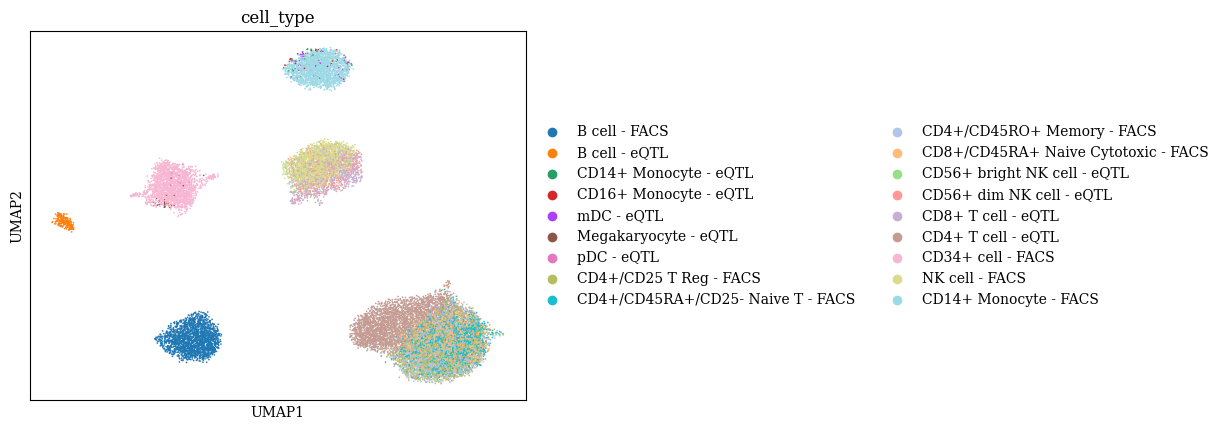

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


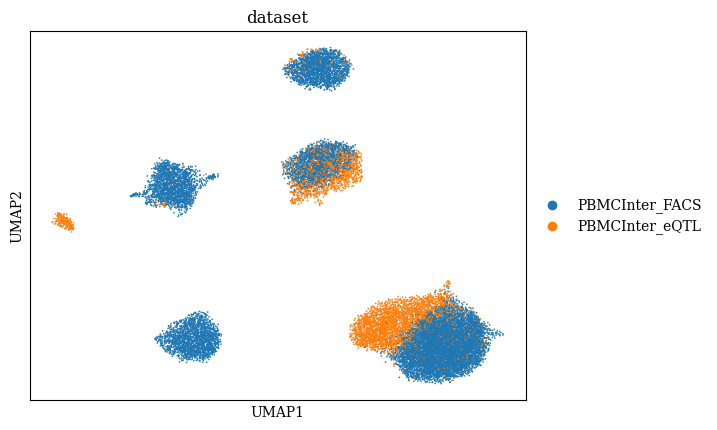

In [18]:
sc.pl.umap(stage_1_pred_data,color=["cell_type"])
sc.pl.umap(stage_1_pred_data,color=["dataset"])

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


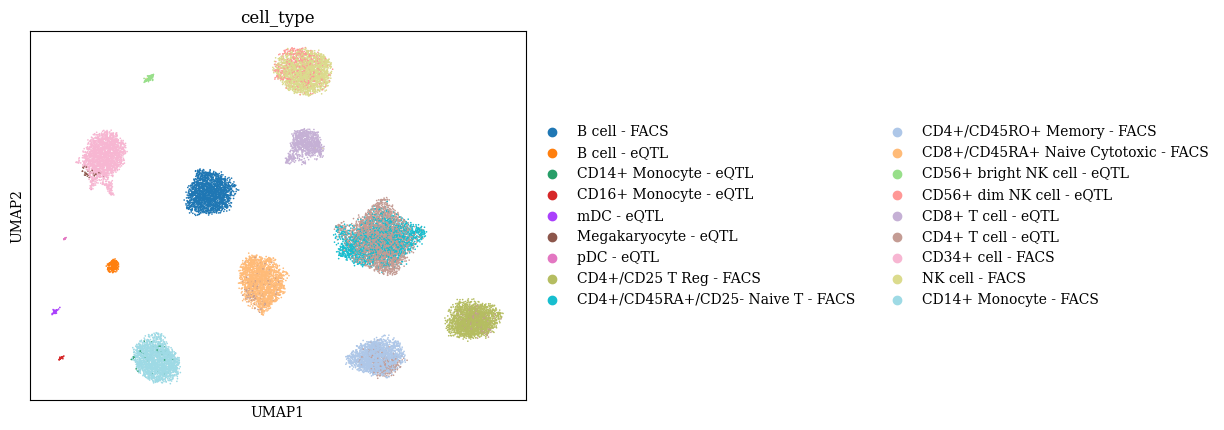

/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/bili/Apps/Mamba/envs/PLL/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


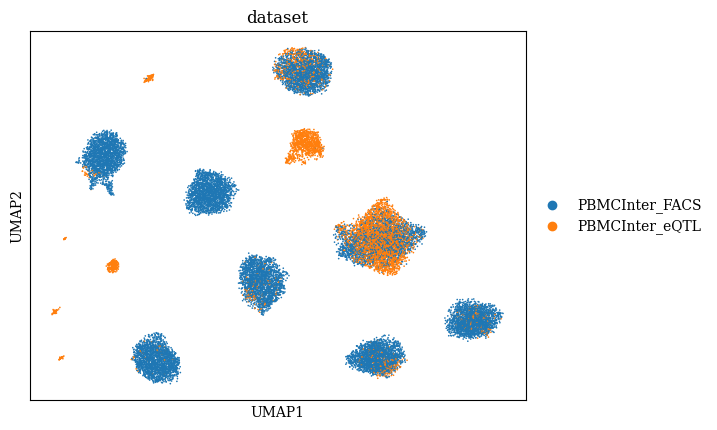

In [19]:
sc.pl.umap(stage_2_pred_data,color=["cell_type"])
sc.pl.umap(stage_2_pred_data,color=["dataset"])